# RMS Titanic

<p>Foi um navio de transporte de passageiros que partira de Southampton para Nova Iorque sendo sua viagem inaugural em 15 de abril de 1912, no trajeto acabou colidindo com um iceberg ocorrendo uma das maiores tragédias de naufrágios da história. Levou muitas vidas embora pois não havia botes salva-vidas para todos, certos tipos de pessoa acabara sendo privilegiadas na hora da evacução resultando em uma grande chance de sobrevivência.</p>

<h1><center>Dicionário dos Dados</center></h1>

| Variável | Tipo | Explicação |
| --- | --- | --- |
| PassengerId | int | Identificador do passageiro |
| Survived | int| Sobrevivênvia: 1 - Sobreviveu e 0 - Não sobreviveu |
| Pclass | int | Classe de Bilhetes: 1 - Primeira, 2 - Segunda e 3 - Terceira|
| Name | string | Nome do passageiro |
| Sex | string | Gênero do passageiro: Male ou Female |
| Age | float | Idade do passageiro |
| SibSp | int | Número de irmãos/Cônjuges |
| Parch | int | Número de pais/filhos |
| Ticket | string | Número do bilhete |
| Fare | float | Preço do bilhete |
| Cabin | string | Número da cabine |
| Embarked | string | Porto de embarcação |

# Perguntas

### 1) A quantidade de sexo por classe de bilhete?<br>
### 2) Relação entre sobreviventes e idade?<br>
### 3) A classe e o preço do bilhete influenciou na escolha dos sobreviventes?<br>

# Importando Bibliotecas<br>


In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Lendo o conjunto de dados<br>

In [131]:
df = pd.read_csv('titanic-data-6.csv')

# Olhando 5 primeiras linhas<br>

In [132]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Total de linha e colunas do conjunto de dados<br>

In [133]:
df.shape

(891, 12)

# Descrevendo o conjunto de dados<br>

Estatíticas Descritivas: quantidade, média, desvio padrão, mínimo, 1°quartil,  2°quartil, 3° quartil e máximo.<br>

In [134]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Obtendo informações do conjunto de dados <br>

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Quantidade de valores nulos em cada variável <br>

In [136]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Renomeando o nome das colunas para minúsculo<br>

In [137]:
df.rename(columns= lambda x : x.lower(), inplace=True)

In [138]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preenchendo os valores nulos da idade com a média das idades<br>

In [139]:
df['age'] = df['age'].fillna(df['age'].mean())

# Quantidade de Gênero (sex) por Classe de Bilhete (pclass)<br>

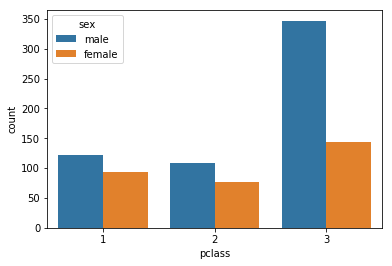

In [140]:
sns.countplot(x='pclass', hue='sex', data=df)

# Relação entre Classe de Bilhete (pclass) e se sobreviveu (survived) 

/home/yan-ibti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


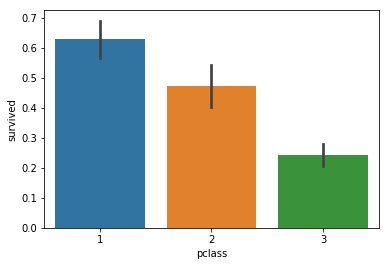

In [141]:
sns.barplot(x='pclass', y='survived', data=df)

# Gasto das pessoas (fare) por classe de bilhete (pclass) e sobreviventes (survived)<br> 

/home/yan-ibti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


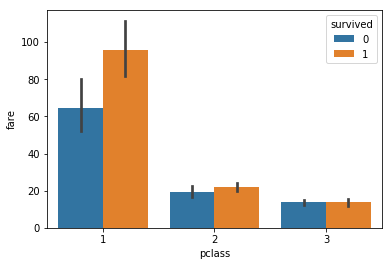

In [142]:
sns.barplot(x='pclass', y='fare', hue='survived', data=df)

# Resultados<br>

A maioria dos passageiros é do sexo masculino em todas as classes de bilhetes tendo a maior venda de bilhete para a 3° classe.<br>

A relação entre sobreviventes e a classe de bilhete mostrou que os passageiros da 1° classe teve a maior taxa de sobrevivênvia suguindo da 2° e 3° respectivamente.<br>

A escolha dos sobreviventes foi fortemente influenciada pela classe e preço do bilhete quanto mais caro e melhor a chance de sobreviver era maior.<br>